In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv("train.csv")
train_add = pd.read_csv("train_add.csv")
data_2014 = pd.read_csv("2014_add.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample_submit.csv",header=None)
stadium = pd.read_csv("stadium.csv")
condition= pd.read_csv("condition.csv")
condition_add= pd.read_csv("condition_add.csv")

In [3]:
# trainとtrain_addを結合
train = pd.concat([train,train_add])

In [4]:
# in[3]で結合したtrainにさらにtrain_add2を結合
train = pd.concat([train,data_2014])

In [5]:
# conditionとcondition_addを結合
condtion = pd.concat([condition,condition_add])

In [6]:
# ln[4]で結合したtrainにln[5]で結合したconditionを結合
train= pd.merge(train,condition,how='left',left_on= 'id',right_on='id')

In [7]:
train.to_csv('train_id.csv')

In [8]:
print(stadium)

                         name                   address   capa
0                 名古屋市瑞穂陸上競技場          愛知県名古屋市瑞穂区山下通5-1  20000
1                     豊田スタジアム              愛知県豊田市千石町7-2  40000
2                   フクダ電子アリーナ          千葉県千葉市中央区川崎町1-20  18500
3                    日立柏サッカー場            千葉県柏市日立台1-2-50  15349
4                  ニンジニアスタジアム              愛媛県松山市上野町乙46  15576
5                レベルファイブスタジアム       福岡県福岡市博多区東平尾公園2-1-1  22563
6                北九州市立本城陸上競技場       福岡県北九州市八幡西区御開4-16-1  10202
7           岐阜メモリアルセンター長良川競技場       岐阜県岐阜市長良福光大野2675-28  20000
8                 正田醤油スタジアム群馬               群馬県前橋市敷島町66  15135
9                エディオンスタジアム広島        広島県広島市安佐南区大塚西5-1-1  50000
10                      札幌ドーム             北海道札幌市豊平区羊ヶ丘1  39232
11                  札幌厚別公園競技場       北海道札幌市厚別区上野幌3条1-2-1  19620
12                ノエビアスタジアム神戸         兵庫県神戸市兵庫区御崎町1-2-2  30132
13             県立カシマサッカースタジアム           茨城県鹿嶋市神向寺後山26-2  40728
14              ケーズデンキスタジアム水戸           茨城県水戸市小吹町2058-1

In [9]:
# stadium.csvを辞書にする
stadium_df = stadium.to_dict()
print(stadium_df)

{'name': {0: '名古屋市瑞穂陸上競技場', 1: '豊田スタジアム', 2: 'フクダ電子アリーナ', 3: '日立柏サッカー場', 4: 'ニンジニアスタジアム', 5: 'レベルファイブスタジアム', 6: '北九州市立本城陸上競技場', 7: '岐阜メモリアルセンター長良川競技場', 8: '正田醤油スタジアム群馬', 9: 'エディオンスタジアム広島', 10: '札幌ドーム', 11: '札幌厚別公園競技場', 12: 'ノエビアスタジアム神戸', 13: '県立カシマサッカースタジアム', 14: 'ケーズデンキスタジアム水戸', 15: '鹿児島県立鴨池陸上競技場 ', 16: '等々力陸上競技場', 17: '日産スタジアム', 18: 'ニッパツ三ツ沢球技場', 19: 'Ｓｈｏｎａｎ\u3000ＢＭＷスタジアム平塚', 20: 'うまかな・よかなスタジアム', 21: '熊本市水前寺競技場', 22: '京都市西京極総合運動公園陸上競技場兼球技場', 23: 'ユアテックスタジアム仙台', 24: '松本平広域公園総合球技場', 25: 'デンカビッグスワンスタジアム', 26: '大分銀行ドーム', 27: 'シティライトスタジアム', 28: '万博記念競技場', 29: 'キンチョウスタジアム', 30: 'ヤンマースタジアム長居', 31: 'ベストアメニティスタジアム', 32: '佐賀県総合運動場陸上競技場', 33: '埼玉スタジアム２００２', 34: 'ＮＡＣＫ５スタジアム大宮', 35: 'ＩＡＩスタジアム日本平', 36: 'エコパスタジアム', 37: 'ヤマハスタジアム（磐田）', 38: '栃木県グリーンスタジアム', 39: '鳴門・大塚スポーツパーク\u3000ポカリスエットスタジアム', 40: '味の素スタジアム', 41: '町田市立陸上競技場', 42: '国立競技場', 43: '駒沢オリンピック公園総合運動場陸上競技場', 44: 'とりぎんバードスタジアム', 45: '富山県総合運動公園陸上競技場', 46: 'ＮＤソフトスタジアム山形', 47: '山梨中銀スタジアム', 48: '熊谷スポーツ文化公園陸上競技場', 49: '神戸総合運動公園ユニバー記念競技場', 50: '宮城スタ

In [10]:
# stadium名をindexにしてaddressとcapaを紐付けた。
stadium_df =stadium.set_index('name').T.to_dict()
print(stadium_df)

{'名古屋市瑞穂陸上競技場': {'address': '愛知県名古屋市瑞穂区山下通5-1', 'capa': 20000}, '豊田スタジアム': {'address': '愛知県豊田市千石町7-2', 'capa': 40000}, 'フクダ電子アリーナ': {'address': '千葉県千葉市中央区川崎町1-20', 'capa': 18500}, '日立柏サッカー場': {'address': '千葉県柏市日立台1-2-50', 'capa': 15349}, 'ニンジニアスタジアム': {'address': '愛媛県松山市上野町乙46', 'capa': 15576}, 'レベルファイブスタジアム': {'address': '福岡県福岡市博多区東平尾公園2-1-1', 'capa': 22563}, '北九州市立本城陸上競技場': {'address': '福岡県北九州市八幡西区御開4-16-1', 'capa': 10202}, '岐阜メモリアルセンター長良川競技場': {'address': '岐阜県岐阜市長良福光大野2675-28', 'capa': 20000}, '正田醤油スタジアム群馬': {'address': '群馬県前橋市敷島町66', 'capa': 15135}, 'エディオンスタジアム広島': {'address': '広島県広島市安佐南区大塚西5-1-1', 'capa': 50000}, '札幌ドーム': {'address': '北海道札幌市豊平区羊ヶ丘1', 'capa': 39232}, '札幌厚別公園競技場': {'address': '北海道札幌市厚別区上野幌3条1-2-1', 'capa': 19620}, 'ノエビアスタジアム神戸': {'address': '兵庫県神戸市兵庫区御崎町1-2-2', 'capa': 30132}, '県立カシマサッカースタジアム': {'address': '茨城県鹿嶋市神向寺後山26-2', 'capa': 40728}, 'ケーズデンキスタジアム水戸': {'address': '茨城県水戸市小吹町2058-1', 'capa': 12000}, '鹿児島県立鴨池陸上競技場 ': {'address': '鹿児島県鹿児島市与次郎2-2-2', 'capa': 19934}

In [11]:
# lambdaの後に引数を設定し、「:」の後に返り値を設定します。
# ex) x = lambda a : a + 1
#        print(x(5))
# 出力結果：　6

In [12]:
# 関数は、その行の stadium 列の値に応じて、address,capa 列の各行の値を設定します。
# stadium 列の値が指定された行の address,capa 列の値が何になるかを知るために、stadium_dfを作成します。

# def set_values(row, value):
#     return value[row]
   
# train['address','capa'] = train['stadium'].apply(set_values, args =(stadium_df, )) 

# print(train)

In [13]:
train['address']= train['stadium'].apply(lambda x : stadium_df[x]['address'])
print(train)

         id        y  year stage    match     gameday   time       home  \
0     13994  18250.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04     ベガルタ仙台   
1     13995  24316.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   名古屋グランパス   
2     13996  17066.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04      ガンバ大阪   
3     13997  29603.0  2012    Ｊ１   第１節第１日    03/10(土)  14:06  サンフレッチェ広島   
4     13998  25353.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   コンサドーレ札幌   
...     ...      ...   ...   ...      ...         ...    ...        ...   
1986  16398      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  14:05       ＦＣ岐阜   
1987  16400      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  13:03   カマタマーレ讃岐   
1988  16403      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  19:03     ロアッソ熊本   
1989  16428      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       栃木ＳＣ   
1990  16430      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       横浜ＦＣ   

           away            stadium  ...   away_03        away_04  away_05  \
0      鹿島アントラーズ       

In [14]:
test['address']= test['stadium'].apply(lambda x : stadium_df[x]['address'])
print(train)

         id        y  year stage    match     gameday   time       home  \
0     13994  18250.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04     ベガルタ仙台   
1     13995  24316.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   名古屋グランパス   
2     13996  17066.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04      ガンバ大阪   
3     13997  29603.0  2012    Ｊ１   第１節第１日    03/10(土)  14:06  サンフレッチェ広島   
4     13998  25353.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   コンサドーレ札幌   
...     ...      ...   ...   ...      ...         ...    ...        ...   
1986  16398      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  14:05       ＦＣ岐阜   
1987  16400      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  13:03   カマタマーレ讃岐   
1988  16403      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  19:03     ロアッソ熊本   
1989  16428      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       栃木ＳＣ   
1990  16430      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       横浜ＦＣ   

           away            stadium  ...   away_03        away_04  away_05  \
0      鹿島アントラーズ       

In [15]:
train.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address
0,13994,18250.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78
1,13995,24316.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,愛知県豊田市千石町7-2
2,13996,17066.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,北本 久仁衛,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,大阪府吹田市千里万博公園5-2
3,13997,29603.0,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,阿部 勇樹,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,広島県広島市安佐南区大塚西5-1-1
4,13998,25353.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,チョ ビョングク,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,北海道札幌市豊平区羊ヶ丘1


In [16]:
train['capa']= train['stadium'].apply(lambda x : stadium_df[x]['capa'])
print(train)

         id        y  year stage    match     gameday   time       home  \
0     13994  18250.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04     ベガルタ仙台   
1     13995  24316.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   名古屋グランパス   
2     13996  17066.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04      ガンバ大阪   
3     13997  29603.0  2012    Ｊ１   第１節第１日    03/10(土)  14:06  サンフレッチェ広島   
4     13998  25353.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   コンサドーレ札幌   
...     ...      ...   ...   ...      ...         ...    ...        ...   
1986  16398      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  14:05       ＦＣ岐阜   
1987  16400      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  13:03   カマタマーレ讃岐   
1988  16403      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  19:03     ロアッソ熊本   
1989  16428      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       栃木ＳＣ   
1990  16430      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       横浜ＦＣ   

           away            stadium  ...        away_04  away_05  away_06  \
0      鹿島アントラーズ       ユ

In [17]:
test['capa']= test['stadium'].apply(lambda x : stadium_df[x]['capa'])
print(test)

        id  year stage    match     gameday   time       home         away  \
0    15822  2014    Ｊ１  第１８節第１日    08/02(土)  19:04     ベガルタ仙台    大宮アルディージャ   
1    15823  2014    Ｊ１  第１８節第１日    08/02(土)  18:34   鹿島アントラーズ    サンフレッチェ広島   
2    15824  2014    Ｊ１  第１８節第１日    08/02(土)  19:04      浦和レッズ      ヴィッセル神戸   
3    15825  2014    Ｊ１  第１８節第１日    08/02(土)  19:03      柏レイソル     川崎フロンターレ   
4    15827  2014    Ｊ１  第１８節第１日    08/02(土)  19:03  アルビレックス新潟       セレッソ大阪   
..     ...   ...   ...      ...         ...    ...        ...          ...   
308  16432  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:04     カターレ富山     ファジアーノ岡山   
309  16433  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:04  京都サンガF.C.         ＦＣ岐阜   
310  16434  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03   カマタマーレ讃岐  ジェフユナイテッド千葉   
311  16435  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:04     アビスパ福岡       ロアッソ熊本   
312  16436  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03    大分トリニータ      湘南ベルマーレ   

                   stadium                                     

In [18]:
train.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,13994,18250.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694
1,13995,24316.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,愛知県豊田市千石町7-2,40000
2,13996,17066.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000
3,13997,29603.0,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000
4,13998,25353.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232


In [19]:
train.to_csv('train_id_stadium.csv')

In [20]:
test = pd.concat([test,data_2014])

In [21]:
test= pd.merge(test,condition,how='left',left_on= 'id',right_on='id')

In [22]:
test.to_csv('test_id.csv')

In [23]:
test['address']= test['stadium'].apply(lambda x : stadium_df[x]['address'])
print(test)

        id  year stage    match     gameday   time       home       away  \
0    15822  2014    Ｊ１  第１８節第１日    08/02(土)  19:04     ベガルタ仙台  大宮アルディージャ   
1    15823  2014    Ｊ１  第１８節第１日    08/02(土)  18:34   鹿島アントラーズ  サンフレッチェ広島   
2    15824  2014    Ｊ１  第１８節第１日    08/02(土)  19:04      浦和レッズ    ヴィッセル神戸   
3    15825  2014    Ｊ１  第１８節第１日    08/02(土)  19:03      柏レイソル   川崎フロンターレ   
4    15827  2014    Ｊ１  第１８節第１日    08/02(土)  19:03  アルビレックス新潟     セレッソ大阪   
..     ...   ...   ...      ...         ...    ...        ...        ...   
346  16398  2014    Ｊ２  第３９節第１日    11/01(土)  14:05       ＦＣ岐阜    大分トリニータ   
347  16400  2014    Ｊ２  第３９節第１日    11/01(土)  13:03   カマタマーレ讃岐  ギラヴァンツ北九州   
348  16403  2014    Ｊ２  第３９節第１日    11/01(土)  19:03     ロアッソ熊本   モンテディオ山形   
349  16428  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       栃木ＳＣ  Ｖ・ファーレン長崎   
350  16430  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       横浜ＦＣ  ギラヴァンツ北九州   

               stadium                                tv  ... away_02  \
0         ユアテッ

In [24]:
test.to_csv('test_id_stadium.csv')

In [25]:
# 基本統計量の確認
train.describe()

,id,y,year,home_score,away_score,temperature,capa
count,1991.000000,1953.000000,1991.000000,1721.000000,1721.000000,1721.000000,1991.000000
mean,15070.946760,10629.558116,2012.842793,1.365485,1.205694,20.471528,25678.006027
std,659.083664,8102.315189,0.768014,1.188880,1.124046,6.426897,14001.154338
min,13994.000000,0.000000,2012.000000,0.000000,0.000000,3.400000,3560.000000
25%,14491.500000,4687.000000,2012.000000,0.000000,0.000000,15.800000,15589.000000
50%,15063.000000,8594.000000,2013.000000,1.000000,1.000000,21.400000,20246.000000
75%,15560.500000,13471.000000,2013.000000,2.000000,2.000000,25.600000,30132.000000
max,16430.000000,62632.000000,2014.000000,7.000000,8.000000,34.200000,72327.000000


In [26]:
# trainデータのy(観客数)の値の平均を求める
train["y"].mean()

10629.558115719406

In [27]:
# y（観客数）が10000以上を求める
train[train["y"]>=10000]

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,13994,18250.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694
1,13995,24316.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,愛知県豊田市千石町7-2,40000
2,13996,17066.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000
3,13997,29603.0,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000
4,13998,25353.0,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,15810,12673.0,2014,Ｊ１,第１６節第１日,07/23(水),19:04,サンフレッチェ広島,柏レイソル,エディオンスタジアム広島,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,広島県広島市安佐南区大塚西5-1-1,50000
1918,15811,10860.0,2014,Ｊ１,第１６節第１日,07/23(水),19:05,徳島ヴォルティス,浦和レッズ,鳴門・大塚スポーツパーク ポカリスエットスタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,徳島県鳴門市撫養町立岩字四枚61,19637
1920,15818,16261.0,2014,Ｊ１,第１７節第１日,07/27(日),19:04,名古屋グランパス,横浜Ｆ・マリノス,名古屋市瑞穂陸上競技場,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,愛知県名古屋市瑞穂区山下通5-1,20000
1921,15975,12658.0,2014,Ｊ２,第１節第１日,03/02(日),13:04,東京ヴェルディ,松本山雅ＦＣ,味の素スタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,東京都調布市西町376-3,49970


In [28]:
# trainデータのJ１でかつyを小さい順にソート
train[train["stage"] == "Ｊ１"].sort_values(by="y")

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
1385,15699,0.0,2014,Ｊ１,第４節第１日,03/23(日),15:04,浦和レッズ,清水エスパルス,埼玉スタジアム２００２,...,カルフィン ヨン ア ピン,吉田 豊,河井 陽介,六平 光成,竹内 涼,大前 元紀,ノヴァコヴィッチ,長沢 駿,埼玉県さいたま市緑区中野田500,63700
56,14053,5432.0,2012,Ｊ１,第７節第１日,04/21(土),17:05,サガン鳥栖,アルビレックス新潟,佐賀県総合運動場陸上競技場,...,石川 直樹,金 珍洙,三門 雄大,本間 勲,ミシェウ,アラン ミネイロ,平井 将生,ブルーノ ロペス,佐賀県佐賀市日の出2-1-10,17000
792,14965,5698.0,2013,Ｊ１,第１５節第１日,07/10(水),19:04,ジュビロ磐田,アルビレックス新潟,ヤマハスタジアム（磐田）,...,大井 健太郎,金 珍洙,三門 雄大,レオ シルバ,成岡 翔,田中 亜土夢,岡本 英也,川又 堅碁,静岡県磐田市新貝2500,15165
810,14985,6080.0,2013,Ｊ１,第１７節第１日,07/17(水),19:04,湘南ベルマーレ,アルビレックス新潟,Ｓｈｏｎａｎ ＢＭＷスタジアム平塚,...,大井 健太郎,金 珍洙,三門 雄大,レオ シルバ,成岡 翔,田中 亜土夢,田中 達也,川又 堅碁,神奈川県平塚市大原1-1,15100
1426,15744,6096.0,2014,Ｊ１,第９節第１日,04/26(土),14:05,徳島ヴォルティス,アルビレックス新潟,鳴門・大塚スポーツパーク ポカリスエットスタジアム,...,大井 健太郎,金 珍洙,レオ シルバ,小泉 慶,成岡 翔,岡本 英也,鈴木 武蔵,川又 堅碁,徳島県鳴門市撫養町立岩字四枚61,19637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,15931,NaN,2014,Ｊ１,第３０節第１日,10/26(日),19:04,鹿島アントラーズ,浦和レッズ,県立カシマサッカースタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,茨城県鹿嶋市神向寺後山26-2,40728
1963,15938,NaN,2014,Ｊ１,第３０節第１日,10/26(日),19:04,清水エスパルス,サンフレッチェ広島,ＩＡＩスタジアム日本平,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,静岡県静岡市清水区村松3880-1,20281
1964,15946,NaN,2014,Ｊ１,第３１節第２日,11/03(月・祝),17:04,横浜Ｆ・マリノス,浦和レッズ,日産スタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,神奈川県横浜市港北区小机町3300,72327
1965,15948,NaN,2014,Ｊ１,第３２節第１日,11/22(土),17:04,ベガルタ仙台,セレッソ大阪,ユアテックスタジアム仙台,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,宮城県仙台市泉区七北田字柳78,19694


In [29]:
# 大きい順にソート
train[train["stage"] == "Ｊ１"].sort_values(by="y",ascending=False)

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
1844,15127,62632.0,2013,Ｊ１,第３３節第１日,11/30(土),14:04,横浜Ｆ・マリノス,アルビレックス新潟,日産スタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,神奈川県横浜市港北区小机町3300,72327
942,15134,54905.0,2013,Ｊ１,第３４節第１日,12/07(土),15:34,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,...,酒本 憲幸,山下 達也,扇原 貴宏,山口 螢,南野 拓実,杉本 健勇,柿谷 曜一朗,エジノ,埼玉県さいたま市緑区中野田500,63700
1463,15787,54350.0,2014,Ｊ１,第１４節第１日,05/17(土),14:04,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,...,ゴイコ カチャル,長谷川 アーリアジャスール,山口 蛍,南野 拓実,丸橋 祐介,酒本 憲幸,柿谷 曜一朗,フォルラン,埼玉県さいたま市緑区中野田500,63700
693,14852,52293.0,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,...,増川 隆洋,阿部 翔平,小川 佳純,中村 直志,ダニルソン,藤本 淳吾,ヤキモフスキー,矢野 貴章,埼玉県さいたま市緑区中野田500,63700
270,14292,51879.0,2012,Ｊ１,第３４節第１日,12/01(土),15:34,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,...,増川 隆洋,田中 隼磨,田口 泰士,ダニルソン,阿部 翔平,小川 佳純,玉田 圭司,永井 謙佑,埼玉県さいたま市緑区中野田500,63700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,15931,NaN,2014,Ｊ１,第３０節第１日,10/26(日),19:04,鹿島アントラーズ,浦和レッズ,県立カシマサッカースタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,茨城県鹿嶋市神向寺後山26-2,40728
1963,15938,NaN,2014,Ｊ１,第３０節第１日,10/26(日),19:04,清水エスパルス,サンフレッチェ広島,ＩＡＩスタジアム日本平,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,静岡県静岡市清水区村松3880-1,20281
1964,15946,NaN,2014,Ｊ１,第３１節第２日,11/03(月・祝),17:04,横浜Ｆ・マリノス,浦和レッズ,日産スタジアム,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,神奈川県横浜市港北区小机町3300,72327
1965,15948,NaN,2014,Ｊ１,第３２節第１日,11/22(土),17:04,ベガルタ仙台,セレッソ大阪,ユアテックスタジアム仙台,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,宮城県仙台市泉区七北田字柳78,19694


In [30]:
# 40000人以上にソート
train[train["y"]>=40000]

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
9,14004,41069.0,2012,Ｊ１,第２節第１日,03/17(土),14:04,浦和レッズ,柏レイソル,埼玉スタジアム２００２,...,増嶋 竜也,橋本 和,レアンドロ ドミンゲス,茨田 陽生,大谷 秀和,ジョルジ ワグネル,田中 順也,リカルド ロボ,埼玉県さいたま市緑区中野田500,63700
74,14071,44422.0,2012,Ｊ１,第９節第１日,05/03(木・祝),19:05,浦和レッズ,横浜Ｆ・マリノス,埼玉スタジアム２００２,...,中澤 佑二,ドゥトラ,熊谷 アンドリュー,兵藤 慎剛,中村 俊輔,齋藤 学,小野 裕二,大黒 将志,埼玉県さいたま市緑区中野田500,63700
177,14186,44131.0,2012,Ｊ１,第２２節第１日,08/18(土),19:04,浦和レッズ,鹿島アントラーズ,埼玉スタジアム２００２,...,山村 和也,新井場 徹,柴崎 岳,青木 剛,ドゥトラ,レナト,興梠 慎三,大迫 勇也,埼玉県さいたま市緑区中野田500,63700
208,14224,46046.0,2012,Ｊ１,第２６節第１日,09/22(土・祝),16:04,浦和レッズ,ガンバ大阪,埼玉スタジアム２００２,...,今野 泰幸,藤春 廣輝,明神 智和,遠藤 保仁,二川 孝広,阿部 浩之,レアンドロ,家長 昭博,埼玉県さいたま市緑区中野田500,63700
254,14275,41296.0,2012,Ｊ１,第３２節第１日,11/17(土),14:06,浦和レッズ,サンフレッチェ広島,埼玉スタジアム２００２,...,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,清水 航平,森﨑 浩司,髙萩 洋次郎,佐藤 寿人,埼玉県さいたま市緑区中野田500,63700
270,14292,51879.0,2012,Ｊ１,第３４節第１日,12/01(土),15:34,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,...,増川 隆洋,田中 隼磨,田口 泰士,ダニルソン,阿部 翔平,小川 佳純,玉田 圭司,永井 謙佑,埼玉県さいたま市緑区中野田500,63700
693,14852,52293.0,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,...,増川 隆洋,阿部 翔平,小川 佳純,中村 直志,ダニルソン,藤本 淳吾,ヤキモフスキー,矢野 貴章,埼玉県さいたま市緑区中野田500,63700
743,14911,40034.0,2013,Ｊ１,第９節第１日,05/03(金・祝),15:34,横浜Ｆ・マリノス,鹿島アントラーズ,日産スタジアム,...,青木 剛,中田 浩二,小笠原 満男,柴崎 岳,野沢 拓也,ジュニーニョ,大迫 勇也,ダヴィ,神奈川県横浜市港北区小机町3300,72327
822,14998,42426.0,2013,Ｊ１,第１９節第１日,08/03(土),18:04,浦和レッズ,サンフレッチェ広島,埼玉スタジアム２００２,...,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,佐藤 寿人,埼玉県さいたま市緑区中野田500,63700
859,15043,40372.0,2013,Ｊ１,第２４節第１日,08/31(土),18:04,浦和レッズ,アルビレックス新潟,埼玉スタジアム２００２,...,舞行龍ジェームズ,金 珍洙,レオ シルバ,三門 雄大,成岡 翔,田中 亜土夢,田中 達也,川又 堅碁,埼玉県さいたま市緑区中野田500,63700


In [31]:
# trainデータのJ１でかつyの値の平均
train[train["stage"] == "Ｊ１"].mean()

id             14822.589217
y              17377.150327
year            2012.821566
home_score         1.469630
away_score         1.278519
temperature       19.897630
capa           33209.784339
dtype: float64

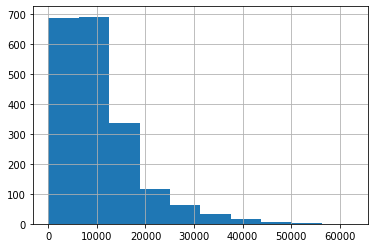

In [32]:
# ヒストグラムを書く
train["y"].hist()

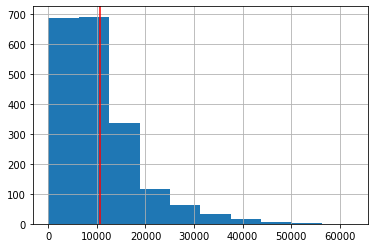

In [33]:
# ヒストグラムで平均値を表す。
# 平均値はaxvlineで引く（色は赤色とする）。
plt.axvline(x=train["y"].mean(),color="red")
train["y"].hist()

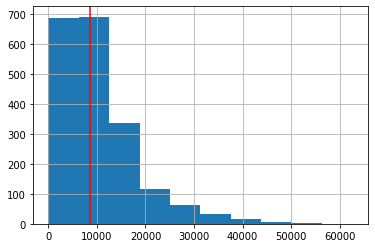

In [34]:
# ヒストグラムで中央値を表す。
# 平均値はaxvlineで引く（色は赤色とする）。
plt.axvline(x=train["y"].median(),color="red")
train["y"].hist()

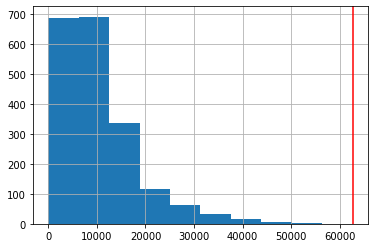

In [35]:
# ヒストグラムで最大値を表すして、平均値はaxvlineで引く（色は赤色とする）
plt.axvline(x=train["y"].max(),color="red")
train["y"].hist()

In [36]:
# 欠損値を確認
train.isnull().sum()

id               0
y               38
year             0
stage            0
match            0
gameday          0
time             0
home             0
away             0
stadium          0
tv               0
home_score     270
away_score     270
weather        270
temperature    270
humidity       270
referee        270
home_team      270
home_01        270
home_02        270
home_03        270
home_04        270
home_05        270
home_06        270
home_07        270
home_08        270
home_09        270
home_10        270
home_11        270
away_team      270
away_01        270
away_02        270
away_03        270
away_04        270
away_05        270
away_06        270
away_07        270
away_08        270
away_09        270
away_10        270
away_11        270
address          0
capa             0
dtype: int64

In [37]:
train = train.drop(['home_score', 'away_score','temperature', 'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03','home_04','home_05','home_06','home_07','home_08', 'home_09','home_10','home_11','away_team','away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_09','away_10','away_11'], axis=1 )

In [38]:
test = test.drop(['home_score', 'away_score','temperature', 'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03','home_04','home_05','home_06','home_07','home_08', 'home_09','home_10','home_11','away_team','away_01','away_02','away_03','away_04','away_05','away_06','away_07','away_08','away_09','away_10','away_11'], axis=1 )

In [39]:
print(train)

         id        y  year stage    match     gameday   time       home  \
0     13994  18250.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04     ベガルタ仙台   
1     13995  24316.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   名古屋グランパス   
2     13996  17066.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04      ガンバ大阪   
3     13997  29603.0  2012    Ｊ１   第１節第１日    03/10(土)  14:06  サンフレッチェ広島   
4     13998  25353.0  2012    Ｊ１   第１節第１日    03/10(土)  14:04   コンサドーレ札幌   
...     ...      ...   ...   ...      ...         ...    ...        ...   
1986  16398      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  14:05       ＦＣ岐阜   
1987  16400      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  13:03   カマタマーレ讃岐   
1988  16403      NaN  2014    Ｊ２  第３９節第１日    11/01(土)  19:03     ロアッソ熊本   
1989  16428      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       栃木ＳＣ   
1990  16430      NaN  2014    Ｊ２  第４２節第１日  11/23(日・祝)  14:03       横浜ＦＣ   

           away            stadium                                  tv  \
0      鹿島アントラーズ       ユアテ

In [40]:
train.isnull().sum()

id           0
y           38
year         0
stage        0
match        0
gameday      0
time         0
home         0
away         0
stadium      0
tv           0
weather    270
address      0
capa         0
dtype: int64

In [41]:
test.isnull().sum()

id          0
year        0
stage       0
match       0
gameday     0
time        0
home        0
away        0
stadium     0
tv          0
address     0
capa       38
weather    38
dtype: int64

In [42]:
#  yの欠損値はmedianで保管する。
train["y"] = train["y"].fillna(train["y"].median())

In [43]:
train.isnull().sum()

id           0
y            0
year         0
stage        0
match        0
gameday      0
time         0
home         0
away         0
stadium      0
tv           0
weather    270
address      0
capa         0
dtype: int64

In [44]:
# 欠損値が一つでも含まれる行・列を削除する: dropna(how='any')
train =train.dropna(how='any')

In [45]:
test =test.dropna(how='any')

In [46]:
train.isnull().sum()

id         0
y          0
year       0
stage      0
match      0
gameday    0
time       0
home       0
away       0
stadium    0
tv         0
weather    0
address    0
capa       0
dtype: int64

In [47]:
test.isnull().sum()

id         0
year       0
stage      0
match      0
gameday    0
time       0
home       0
away       0
stadium    0
tv         0
address    0
capa       0
weather    0
dtype: int64

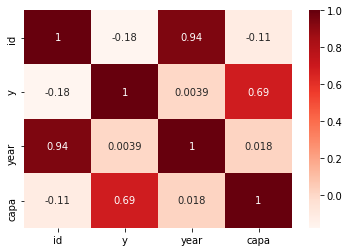

In [48]:
# seabornはデータの可視化(グラフ作成)を行うPythonライブラリ
import seaborn as sns
train_corr = train.corr()
#ヒートマップを表示
# annotは数字を入れるかどうか。cmapは色合い。
sns.heatmap(train_corr, annot=True,cmap='Reds')

In [49]:
# 目的変数はy（観客動員数）
# 説明変数について、観客動員数はtrainのstage（J１か、J2か）、またはhomeがどこのチームか、天気、収容人数が大きな影響を与えていると仮説を立てる。
# ただ、stage、home,awayに質的変数のため、ダミー変数化する。
train_dummie = pd.get_dummies(train[["stage","home","away","weather"]])
capa =train['capa']
y =  train['y']
print(train_dummie)
print(capa)
print(y)

      stage_Ｊ１  stage_Ｊ２  home_アビスパ福岡  home_アルビレックス新潟  home_カターレ富山  \
0            1         0            0               0            0   
1            1         0            0               0            0   
2            1         0            0               0            0   
3            1         0            0               0            0   
4            1         0            0               0            0   
...        ...       ...          ...             ...          ...   
1716         0         1            0               0            1   
1717         0         1            0               0            0   
1718         0         1            0               0            0   
1719         0         1            1               0            0   
1720         0         1            0               0            0   

      home_カマタマーレ讃岐  home_ガイナーレ鳥取  home_ガンバ大阪  home_ギラヴァンツ北九州  home_コンサドーレ札幌  \
0                 0             0           0               0              0   

In [50]:
train_dummie_capa= pd.merge(train_dummie,capa,left_index=True, right_index=True)

In [51]:
train_dummie_capa.to_csv('train_dummie_capa.csv')

In [52]:
test_dummie =pd.get_dummies(test[["stage","home","away","weather"]])
test_capa =test['capa']

In [53]:
test_dummie.head()

,stage_Ｊ１,stage_Ｊ２,home_アビスパ福岡,home_アルビレックス新潟,home_カターレ富山,home_カマタマーレ讃岐,home_ガンバ大阪,home_ギラヴァンツ北九州,home_コンサドーレ札幌,home_サガン鳥栖,...,weather_晴時々曇,weather_曇,weather_曇のち晴,weather_曇のち雨,weather_曇一時雨,weather_曇時々晴,weather_曇時々雨,weather_雨,weather_雨のち曇,weather_雨のち曇一時雨
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
test_dummie_capa= pd.merge(test_dummie,test_capa,left_index=True, right_index=True)

In [55]:
test_dummie_capa.to_csv('test_dummie_capa.csv')

In [56]:
# train_dummieとtest_dummieがどの部分が違うかを見る。
diff = list( set(train_dummie_capa.columns)- set(test_dummie_capa.columns))
print(diff)
print(len(train_dummie_capa.columns))
print(len(test_dummie_capa.columns))

['away_ザスパ草津', 'weather_曇時々晴一時雨', 'weather_晴一時曇', 'weather_曇一時雨のち晴', 'weather_曇一時晴一時雨', 'weather_曇一時雷雨のち曇', 'away_ガイナーレ鳥取', 'away_ＦＣ町田ゼルビア', 'weather_曇のち雷雨', 'home_ザスパ草津', 'weather_雨のち曇時々晴', 'home_ガイナーレ鳥取', 'weather_曇時々雨のち晴', 'weather_晴のち曇一時雨', 'weather_曇一時晴', 'weather_雪のち雨', 'weather_雨時々曇', 'weather_晴時々雨', 'weather_晴のち雨', 'weather_晴のち曇時々雨', 'weather_曇のち雪', 'weather_晴時々雪', 'home_ＦＣ町田ゼルビア', 'weather_雨時々晴', 'weather_雨のち晴']
121
98


In [57]:
print(train_dummie_capa)

      stage_Ｊ１  stage_Ｊ２  home_アビスパ福岡  home_アルビレックス新潟  home_カターレ富山  \
0            1         0            0               0            0   
1            1         0            0               0            0   
2            1         0            0               0            0   
3            1         0            0               0            0   
4            1         0            0               0            0   
...        ...       ...          ...             ...          ...   
1716         0         1            0               0            1   
1717         0         1            0               0            0   
1718         0         1            0               0            0   
1719         0         1            1               0            0   
1720         0         1            0               0            0   

      home_カマタマーレ讃岐  home_ガイナーレ鳥取  home_ガンバ大阪  home_ギラヴァンツ北九州  home_コンサドーレ札幌  \
0                 0             0           0               0              0   

In [58]:
print(test_dummie_capa)

     stage_Ｊ１  stage_Ｊ２  home_アビスパ福岡  home_アルビレックス新潟  home_カターレ富山  \
0           1         0            0               0            0   
1           1         0            0               0            0   
2           1         0            0               0            0   
3           1         0            0               0            0   
4           1         0            0               1            0   
..        ...       ...          ...             ...          ...   
308         0         1            0               0            1   
309         0         1            0               0            0   
310         0         1            0               0            0   
311         0         1            1               0            0   
312         0         1            0               0            0   

     home_カマタマーレ讃岐  home_ガンバ大阪  home_ギラヴァンツ北九州  home_コンサドーレ札幌  home_サガン鳥栖  \
0                0           0               0              0           0   
1                

In [59]:
# trainの['weather_晴一時曇', 'away_ザスパ草津', 'weather_雨のち晴', 'weather_曇のち雷雨', 'weather_晴時々雪', 'weather_晴のち曇一時雨', 'home_ザスパ草津', 'away_ＦＣ町田ゼルビア', 'weather_晴時々雨', 'weather_晴のち雨', 'home_ＦＣ町田ゼルビア', 'weather_曇時々雨のち晴', 'weather_雨時々曇', 'weather_曇一時晴', 'weather_曇時々晴一時雨', 'weather_雨のち曇時々晴', 'weather_曇一時晴一時雨', 'away_ガイナーレ鳥取', 'home_ガイナーレ鳥取', 'weather_曇一時雨のち晴', 'weather_晴のち曇時々雨', 'weather_曇のち雪', 'weather_雪のち雨', 'weather_曇一時雷雨のち曇', 'weather_雨時々晴']を削除する。

In [60]:
train_dummie_capa = train_dummie_capa.drop(['weather_晴一時曇', 'away_ザスパ草津', 'weather_雨のち晴', 'weather_曇のち雷雨', 'weather_晴時々雪', 'weather_晴のち曇一時雨', 'home_ザスパ草津', 'away_ＦＣ町田ゼルビア', 'weather_晴時々雨', 'weather_晴のち雨', 'home_ＦＣ町田ゼルビア', 'weather_曇時々雨のち晴', 'weather_雨時々曇', 'weather_曇一時晴', 'weather_曇時々晴一時雨', 'weather_雨のち曇時々晴', 'weather_曇一時晴一時雨', 'away_ガイナーレ鳥取', 'home_ガイナーレ鳥取', 'weather_曇一時雨のち晴', 'weather_晴のち曇時々雨', 'weather_曇のち雪', 'weather_雪のち雨', 'weather_曇一時雷雨のち曇', 'weather_雨時々晴'],axis=1)

In [61]:
print(train_dummie_capa)

      stage_Ｊ１  stage_Ｊ２  home_アビスパ福岡  home_アルビレックス新潟  home_カターレ富山  \
0            1         0            0               0            0   
1            1         0            0               0            0   
2            1         0            0               0            0   
3            1         0            0               0            0   
4            1         0            0               0            0   
...        ...       ...          ...             ...          ...   
1716         0         1            0               0            1   
1717         0         1            0               0            0   
1718         0         1            0               0            0   
1719         0         1            1               0            0   
1720         0         1            0               0            0   

      home_カマタマーレ讃岐  home_ガンバ大阪  home_ギラヴァンツ北九州  home_コンサドーレ札幌  home_サガン鳥栖  \
0                 0           0               0              0           0   
1  

In [62]:
diff = list( set(test_dummie_capa.columns)- set(train_dummie_capa.columns))
print(diff)
print(len(train_dummie_capa.columns))
print(len(test_dummie_capa.columns))

['weather_雨のち曇一時雨', 'weather_晴のち雪']
96
98


In [63]:
test_dummie_capa = test_dummie_capa.drop(['weather_雨のち曇一時雨', 'weather_晴のち雪'],axis=1)

In [64]:
diff = list( set(test_dummie_capa.columns)- set(train_dummie_capa.columns))
print(diff)
print(len(train_dummie_capa.columns))
print(len(test_dummie_capa.columns))

[]
96
96


In [65]:
model = LinearRegression()
model.fit(train_dummie_capa,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
test['y'] = model.predict(test_dummie_capa)
print(test['y'])

0      14356.488727
1      18371.315919
2      35257.495386
3      13075.574019
4      28643.640189
           ...     
308     3404.195584
309     7236.729412
310     3973.737880
311     5485.755537
312    10085.944543
Name: y, Length: 313, dtype: float64


In [67]:
sample[1] = test['y']

In [68]:
sample.to_csv("submit_capa.csv",index=None,header=None)

In [69]:
# やったこと、ダミー変数に["stage","home","away",　'weather','stadium']を入れてカラム調整をした所大きく順位を下げた。（測定不能状態）
# ["stage","home","away",stadium]にした所あまり順位の下げが変わらない。（測定不能状態）
# ["stage","home","away",　'weather']にした所、["stage","home","away"]より順位が上がった。



# 天気が大きな原因であることがわかったので天気のAPIを用いて分析することにする。